# Simple code using SHAP | Código Simples Utilizando SHAP

In [1]:
import pandas as pd
import shap
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from xgboost import  XGBRegressor
from sklearn.metrics import r2_score


#### Inporting pre-dowloaded keaggle dataset for salarys predictions / Importando arquivo pré-baixado do Keaggle para previsão de salários

|Columns/ Colunas | Type of Data | Description (ENG) | Descrição (PT BR)
|-------------|--------------|-------------------|-----------------|
|**Age** | Numerical/Numérico | Value of Age (Years) | Valor da Idade (Anos) |
|**Gender** |Categorical String/Texto Categórico |Gender (Male/Female) used as *dummy variables* | Genero (Masculino/Feminino) Usado como *variável dummy*|
|**Education Level**| Categorical String/Texto Categórico| (Bachelor's, Master's, PhD) Used as Dummy Variables | (Bacharel, Mestre, PhD) Usado como variável dummy
|**Job Title**|Categorical String/Texto Categórico| Will not be used | Não será usado
|**Years of Experience**| Numerical/Numérico | Time in Years of experience | Tempo em anos de experiência
|**Salary**|Numerical/Numérico| Value will be used as target value| Será usado como variável alvo

Source Link: **https://www.kaggle.com/datasets/rkiattisak/salaly-prediction-for-beginer**

In [2]:
data = pd.read_csv('data/Salary Data.csv')

| English | Portugês |
|---------|----------|
|Creating Dummy Variables | Criando Variáveis Dummy|

In [3]:
dummy_data = pd.get_dummies(data[['Gender', 'Education Level']], dtype=int)
numeric_data = data[['Age', 'Years of Experience', 'Salary']]
df = pd.concat([numeric_data, dummy_data], axis=1)

| English | Portugês |
|---------|----------|
|Removing NaN's (Not a Number) from the dataframe | Removendo NaNs (Não Numéricos) do dataframe|

In [4]:
df.dropna(inplace=True)

In [5]:
y = df['Salary']
X = df.drop('Salary', axis=1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

| English | Portugês |
|---------|----------|
|Creating a Pipeline to scale and train our model | Criando um Pipeline para escalar e treinar nosso modelo|

In [7]:
pipeline_data = Pipeline([
    ('scaler', StandardScaler()), 
    ('xgb', XGBRegressor( 
        n_estimators=100,
        learning_rate=0.1
    ))
])

In [8]:
pipeline_data.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('xgb',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [9]:
y_pred = pipeline_data.predict(X_test)

#### Checking R² of the model / Chegando o R² do modelo

In [10]:
print(f'R² error: {r2_score(y_test, y_pred):.2}')

R² error: 0.87


| English | Portugês |
|---------|----------|
|**Starting to use SHAP library** | **Iniciando o uso da biblioteca SHA** |
|The function Explainer will calculate the Shapley values of the models | A função Explainer irá calcular os valores Shapley do modelo|

In [11]:
explainer  = shap.Explainer(pipeline_data['xgb'], X, feature_names=X.columns)

In [12]:
shap_values = explainer(pipeline_data['scaler'].transform(X_train))

| English | Portugês|
|---------|---------|
|Data analisys of SHAP Values | Análise de dados dos valores SHAP|
|This chart visualizes the feature-wise distribution and its respective contribution to the predicted output, where red indicates high impact and blue denotes low impact. The subsequent chart will further clarify these relationships|Este gráfico apresenta a distribuição das variáveis e sua influência no resultado do modelo, sendo vermelho (alta influência) e azul (baixa influência). A próxima visualização detalhará esses efeitos.|
|Obs: This chart use all predictions in the dataset | Obs: Esse gráfico utiliza todas as previsões no Dataset|

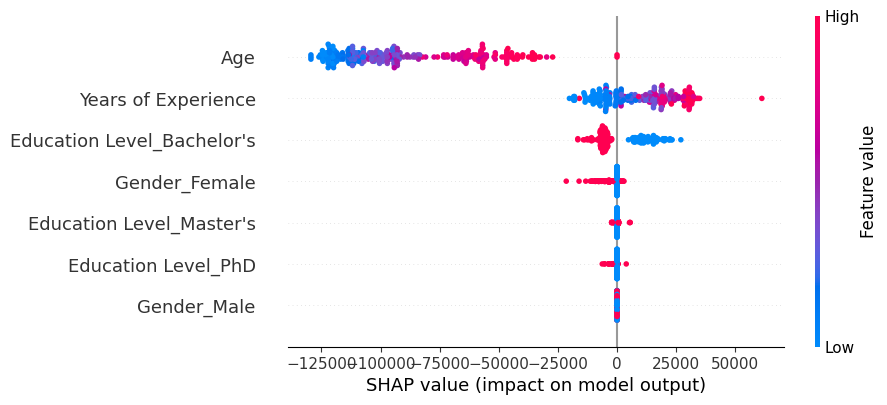

In [13]:
shap.plots.beeswarm(shap_values)

| English | Portugês |
|---------|----------|
|Evalueate Impact by sample | Avaliando impacto por amostra|
|In this example, we analyze a randomly selected sample, which in a real-world scenario would represent the target variable of interest. The visualization enables a comprehensive assessment of both the magnitude and directional impact of each feature on the predicted outcome. Below the chart, the initial values of the corresponding sample are displayed|Neste exemplo, analisamos uma amostra selecionada aleatoriamente, que em um cenário real representaria a variável-alvo de interesse. A visualização permite uma avaliação abrangente tanto da magnitude quanto do impacto direcional de cada feature no resultado previsto. Abaixo do gráfico, são exibidos os valores iniciais da amostra correspondente.
|Obs: Feel free to change the idx variable to see others samples| Obs: Sinta-se livre para alterar a variável idx para ver outras amostras.|

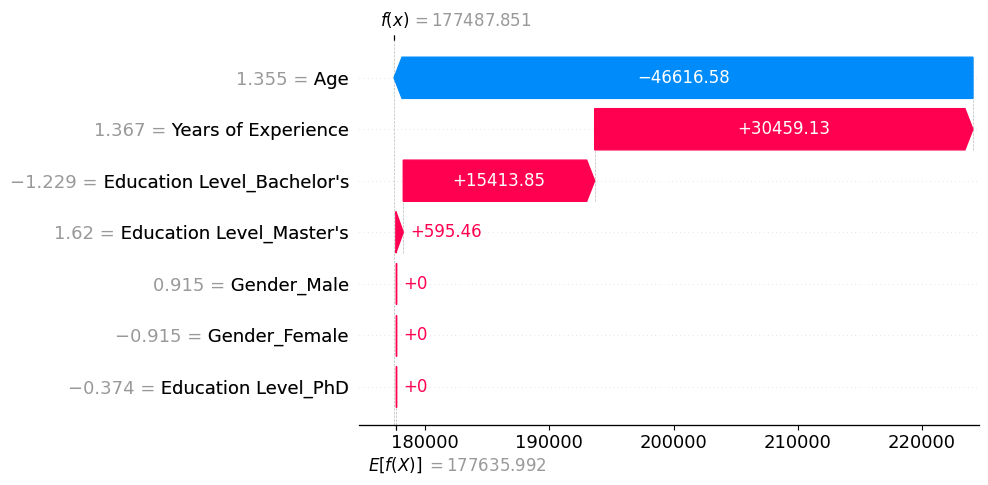

Features
Age                           42.0
Years of Experience           12.0
Gender_Female                  1.0
Gender_Male                    0.0
Education Level_Bachelor's     0.0
Education Level_Master's       1.0
Education Level_PhD            0.0
Name: 6, dtype: float64


In [14]:
idx = 6
shap.plots.waterfall(shap_values[idx], 7, True)
print("Features", X.iloc[idx], sep='\n')

| English | Portugês |
|---------|----------|
| The following chart visualization supports both single-sample and multi-sample analysis. For multiple samples, it displays the absolute magnitude (module) of each feature's impact, while single-sample mode presents the actual directional values.| A próxima visualização funciona tanto para análise individual quanto múltiplas amostras. Para múltiplas amostras, exibe o valor absoluto (módulo) do impacto de cada variável, enquanto no modo de amostra única apresenta os valores reais com direcionalidade.|
| Feel Free to test with one or more samples in diferent ranges | Sintase livre para testar com uma ou mais amostras em diferentes faixas.

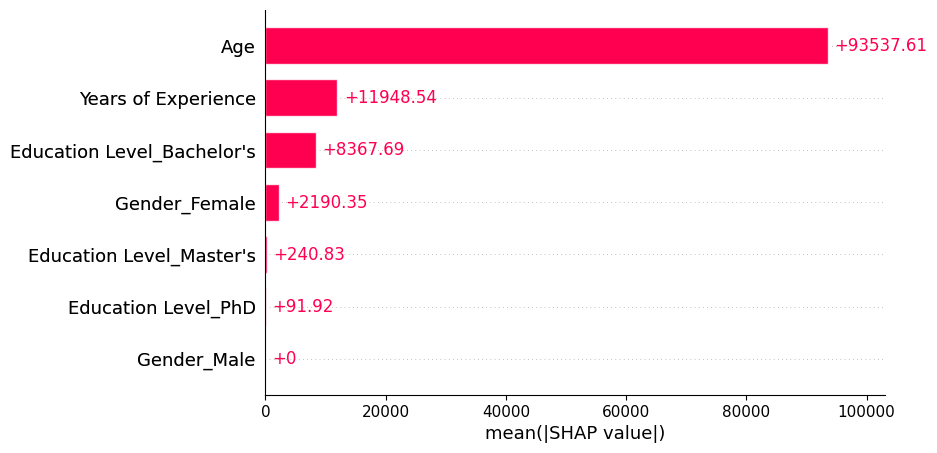

In [15]:
shap.plots.bar(shap_values[:59]) # shap.plots.bar(shap_values[6])

| English | Portugês |
|---------|----------|
|For more details, here is the link to the SHAP library documentation| Para mais detalhes aqui está o link para a documentação da biblioteca SHAP|

**https://shap.readthedocs.io/en/latest/api.html**